## Importing modules

In [1]:
# import sys
# !conda install --yes --prefix {sys.prefix} 
import numpy as np
import pandas as pd
import sklearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import random
import math
import requests
import io
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

# Problem 1

### Iris Dataset

In [2]:
iris= load_iris()
df_iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],columns= iris['feature_names'] + ['Species'])

## Method 1

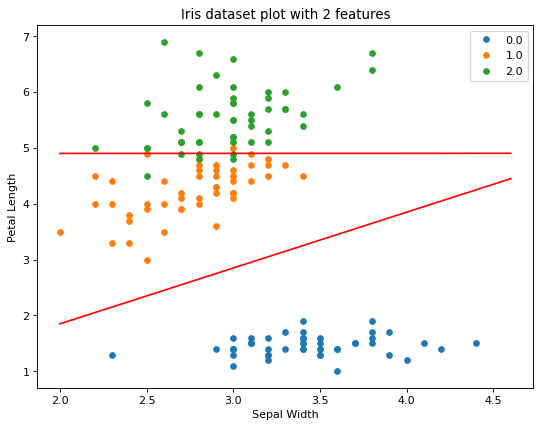

In [3]:
# taking and plotting sepal width and petal length
# fig = plt.figure()
# ax1 = fig.add_subplot(111)
# ax1.scatter(df_iris.iloc[:,1],df_iris.iloc[:,2],s=50,c=df_iris.iloc[:,4],cmap=)
plt.figure(figsize=(8, 6), dpi=80)
groups = df_iris.groupby('Species')
for name, group in groups:
    plt.plot(group['sepal width (cm)'], group['petal length (cm)'], marker='o', linestyle='', markersize=5, label=name)
plt.xlabel('Sepal Width')
plt.ylabel('Petal Length')
plt.legend()
plt.title('Iris dataset plot with 2 features')
x = np.linspace(2,4.6,100)
y = -0.15+x*1
plt.plot(x, y, '-r')
x = np.linspace(2,4.6,100)
y = 4.9+x*0.001
plt.plot(x, y, '-r')

## Method 2

### Split Iris data

In [4]:
# y = (list(df_iris.iloc[:,4]))
# x1 = (list(df_iris.iloc[:,0]))
# x2 = (list(df_iris.iloc[:,1]))
# x3 = (list(df_iris.iloc[:,2]))
# x4 = (list(df_iris.iloc[:,3]))
X = df_iris.iloc[:, 0:4].values
Y = df_iris.iloc[:, 4].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

### Feature scaling

In [5]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_test.shape

(30, 4)

### Performing MDA

In [6]:
lda = LDA(n_components=2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)
X_train0=X_train[:,0]
X_train1=X_train[:,1]
iris_train=list(zip(list(X_train0),list(X_train1),list(y_train)))
iris_train=pd.DataFrame (iris_train, columns = ['a','b','c'])
iris_train.head()

,a,b,c
0,-4.840674,-0.071332,2.0
1,-2.882114,-0.417209,1.0
2,8.035680,0.326957,0.0
3,-3.894706,0.343586,2.0
4,-6.549838,0.436394,2.0


### Plotting the test features

Text(0.5, 1.0, 'Iris training set plot after performing MDA')

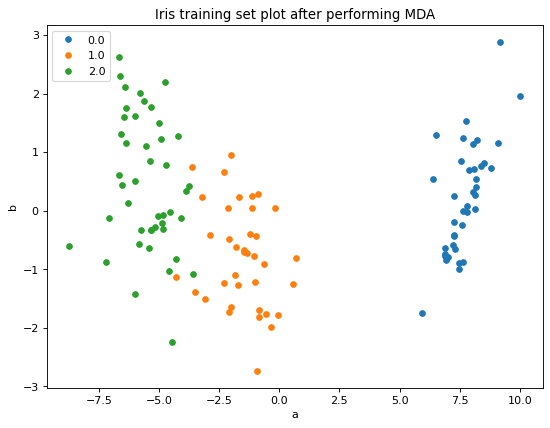

In [7]:
plt.figure(figsize=(8, 6), dpi=80)
groups = iris_train.groupby('c')
for name, group in groups:
    plt.plot(group['a'], group['b'], marker='o', linestyle='', markersize=5, label=name)
plt.xlabel('a')
plt.ylabel('b')
plt.legend()
plt.title('Iris training set plot after performing MDA')

# Problem 2

### Importing training and testing Dataset
I extracted the first 100 training points and first 50 test points with labels sneaker, pullover and boots beforehand and uploaded it to my github repo which i have imported here.

In [8]:
url1 = "https://raw.githubusercontent.com/Sankalp2002/IML_datasets/main/fashiontrain300.csv"
url2 = "https://raw.githubusercontent.com/Sankalp2002/IML_datasets/main/fashiontest150.csv"
download1 = requests.get(url1).content
download2 = requests.get(url2).content
df_train= pd.read_csv(io.StringIO(download1.decode('utf-8')))
df_test = pd.read_csv(io.StringIO(download2.decode('utf-8')))
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,1,1,0,0,0,...,0,0,118,190,162,82,0,0,0,0
2,2,0,0,0,0,0,0,0,0,16,...,0,0,1,1,1,1,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## (i) Plotting training set

### Using MDA

In [9]:
y_train=df_train.iloc[:,0]
X_train=df_train.drop(['label'], axis=1)
y_test=df_test.iloc[:,0]
X_test=df_test.drop(['label'], axis=1)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

lda = LDA(n_components=2)
lda_result = lda.fit_transform(X_train, y_train)

lda_testset=lda.fit_transform(X_test,y_test) 
# X_test = lda.transform(X_test)
# X_test0=X_test[:,0]
# X_test1=X_test[:,1]
X_train0=lda_result[:,0]
X_train1=lda_result[:,1]
# lda_test=list(zip(list(X_test0),list(X_test1),list(y_test)))
# lda_test=pd.DataFrame (lda_test, columns = ['a','b','c'])
lda_train=list(zip(list(X_train0),list(X_train1),list(y_train)))
lda_train=pd.DataFrame (lda_train, columns = ['a','b','c'])

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Fashion training set plot after performing MDA')

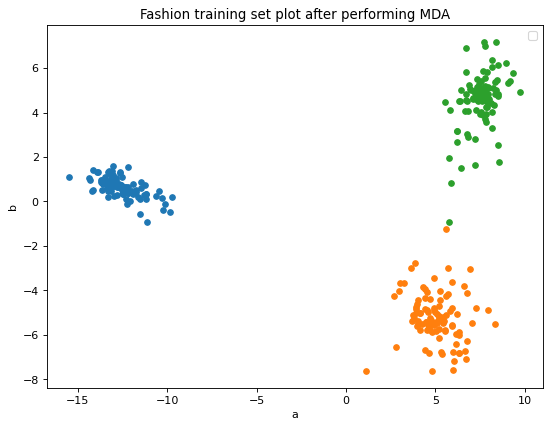

In [10]:
plt.figure(figsize=(8, 6), dpi=80)
groups = lda_train.groupby('c')
name=['sneaker', 'pullover', 'boots']
for name, group in groups:
    plt.plot(group['a'], group['b'], marker='o', linestyle='', markersize=5)
plt.xlabel('a')
plt.ylabel('b')
plt.legend()
plt.title('Fashion training set plot after performing MDA')

### Using PCA

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Fashion training set plot after performing PCA')

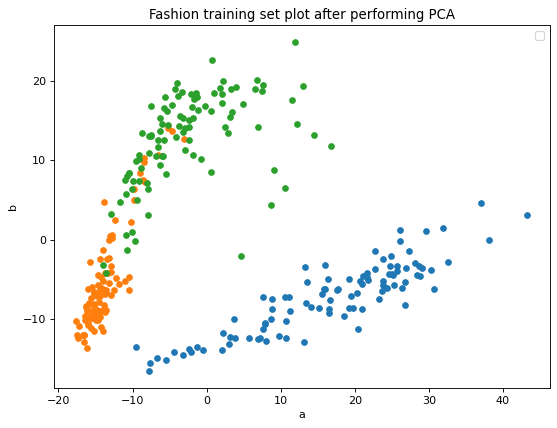

In [11]:
y_train=df_train.iloc[:,0]
X_train=df_train.drop(['label'], axis=1)
y_test=df_test.iloc[:,0]
X_test=df_test.drop(['label'], axis=1)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_train,y_train)

X_train0=pca_result[:,0]
X_train1=pca_result[:,1]
pca_train=list(zip(list(X_train0),list(X_train1),list(y_train)))
pca_train=pd.DataFrame (pca_train, columns = ['a','b','c'])

pca_testset=pca.fit_transform(X_test) 

plt.figure(figsize=(8, 6), dpi=80)
groups = pca_train.groupby('c')
name=['sneaker', 'pullover', 'boots']
for name, group in groups:
    plt.plot(group['a'], group['b'], marker='o', linestyle='', markersize=5)
plt.xlabel('a')
plt.ylabel('b')
plt.legend()
plt.title('Fashion training set plot after performing PCA')

### Using t-sne

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Fashion training set plot after performing T-SNE')

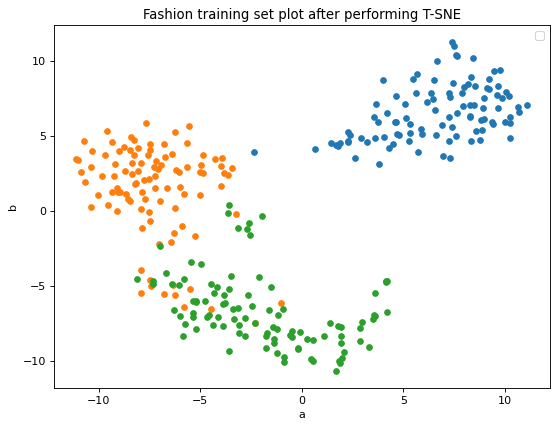

In [12]:
y_train=df_train.iloc[:,0]
X_train=df_train.drop(['label'], axis=1)
y_test=df_test.iloc[:,0]
X_test=df_test.drop(['label'], axis=1)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

tsne = TSNE(n_components=2, random_state=0, perplexity=50)
tsne_result = tsne.fit_transform(X_train) 

X_train0=tsne_result[:,0]
X_train1=tsne_result[:,1]
tsne_train=list(zip(list(X_train0),list(X_train1),list(y_train)))
tsne_train=pd.DataFrame (tsne_train, columns = ['a','b','c'])

tsne_testset=tsne.fit_transform(X_test) 

plt.figure(figsize=(8, 6), dpi=80)
groups = tsne_train.groupby('c')
name=['sneaker', 'pullover', 'boots']
for name, group in groups:
    plt.plot(group['a'], group['b'], marker='o', linestyle='', markersize=5)
plt.xlabel('a')
plt.ylabel('b')
plt.legend()
plt.title('Fashion training set plot after performing T-SNE')

## (ii) Checking the accuracy of testing set

In [13]:
pca_model= KNeighborsClassifier(n_neighbors=3)
lda_model= KNeighborsClassifier(n_neighbors=3)
tsne_model= KNeighborsClassifier(n_neighbors=3)

In [14]:
lda_model.fit(lda_result,y_train)
pca_model.fit(pca_result,y_train)
tsne_model.fit(tsne_result,y_train)

predicted_lda=lda_model.predict(lda_testset)
predicted_pca=pca_model.predict(pca_testset)
predicted_tsne=tsne_model.predict(tsne_testset)

error_lda=0
error_pca=0
error_tsne=0

for i in range(50):
    if predicted_lda[i]!=y_test[i]:
        error_lda=error_lda+1
    if predicted_pca[i]!=y_test[i]:
        error_pca=error_pca+1
    if predicted_tsne[i]!=y_test[i]:
        error_tsne=error_tsne+1
print(error_lda)
print(error_pca)
print(error_tsne)

0
0
3
